# Análise fatores de colocação de estudantes universitários <br>
Dataset: = https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset
<br><br>

# Preparação dos Dados

Carregando os Dados

In [ ]:
import pandas as pd

df = pd.read_csv('college_student_placement_dataset.csv', sep=',')
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


Verificando NaN e limpando o data frame

In [ ]:
#Verificando se tem valores nulos
df.isnull().any()

,0
College_ID,False
IQ,False
Prev_Sem_Result,False
CGPA,False
Academic_Performance,False
Internship_Experience,False
Extra_Curricular_Score,False
Communication_Skills,False
Projects_Completed,False
Placement,False


In [ ]:
# Selecionando linha(s) com NaN
row_nan = df[df.isnull().any(axis=1)]
row_nan

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement


In [ ]:
# Removendo as Linhas com NaN
df = df.dropna()

In [ ]:
# Verificando novamente se possui NaN
df.isnull().any()

,0
Company Names,False
Cars Names,False
Engines,False
CC/Battery Capacity,False
HorsePower,False
Total Speed,False
Performance(0 - 100 )KM/H,False
Cars Prices,False
Fuel Types,False
Seats,False


Cirando uma coluna que mede a eficiência do aluno, QI em relação ao CGPA

In [ ]:
df['IQ_CGPA_ratio'] = df['IQ'] / (df['CGPA'] + 0.01)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,IQ_CGPA_ratio
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No,17.011129
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No,18.029740
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No,18.664384
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No,21.180556
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No,12.467532
...,...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes,14.337349
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No,7.486631
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No,14.217252
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No,11.982083


In [ ]:
def func(x):
  if x <

Criando uma coluna para classificar os projetos concluídos

In [ ]:
bins = [0, 7, 8.5, 10]  # Definindo as faixas de corte
labels = ['Baixo', 'Médio', 'Alto']
df['CGPA_Classification'] = pd.cut(df['CGPA'], bins=bins, labels=labels, include_lowest=True)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,IQ_CGPA_ratio,CGPA_Classification
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No,17.011129,Baixo
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No,18.029740,Baixo
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No,18.664384,Baixo
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No,21.180556,Baixo
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No,12.467532,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes,14.337349,Médio
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No,7.486631,Alto
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No,14.217252,Baixo
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No,11.982083,Alto


# Análsie Exploratória de Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   College_ID              10000 non-null  object  
 1   IQ                      10000 non-null  int64   
 2   Prev_Sem_Result         10000 non-null  float64 
 3   CGPA                    10000 non-null  float64 
 4   Academic_Performance    10000 non-null  int64   
 5   Internship_Experience   10000 non-null  object  
 6   Extra_Curricular_Score  10000 non-null  int64   
 7   Communication_Skills    10000 non-null  int64   
 8   Projects_Completed      10000 non-null  int64   
 9   Placement               10000 non-null  object  
 10  IQ_CGPA_ratio           10000 non-null  float64 
 11  CGPA_Classification     9751 non-null   category
dtypes: category(1), float64(3), int64(5), object(3)
memory usage: 869.4+ KB


In [ ]:
# Dado Categórico
df['CGPA_Classification'].value_counts()

,count
CGPA_Classification,
Baixo,3898
Médio,3024
Alto,2829


In [ ]:
# Dado Quantitativo
df['Academic_Performance'].value_counts()

,count
Academic_Performance,
10,1044
7,1027
8,1025
4,1004
2,995
3,991
6,990
9,987
5,974


Medidas de Sumarização

In [ ]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,IQ_CGPA_ratio
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400,13.732089
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959,3.538585
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000,4.560261
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000,11.098901
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000,13.207547
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000,15.916176
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000,28.460039


In [ ]:
# Restrição dos Dados Quantitativos
df[['CGPA', 'IQ', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'IQ_CGPA_ratio']].describe()

,CGPA,IQ,Prev_Sem_Result,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,IQ_CGPA_ratio
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.532379,99.471800,7.535673,5.546400,4.970900,5.561800,2.513400,13.732089
std,1.470141,15.053101,1.447519,2.873477,3.160103,2.900866,1.715959,3.538585
min,4.540000,41.000000,5.000000,1.000000,0.000000,1.000000,0.000000,4.560261
25%,6.290000,89.000000,6.290000,3.000000,2.000000,3.000000,1.000000,11.098901
50%,7.550000,99.000000,7.560000,6.000000,5.000000,6.000000,3.000000,13.207547
75%,8.770000,110.000000,8.790000,8.000000,8.000000,8.000000,4.000000,15.916176
max,10.460000,158.000000,10.000000,10.000000,10.000000,10.000000,5.000000,28.460039


array([[<Axes: title={'center': 'CGPA'}>, <Axes: title={'center': 'IQ'}>,
        <Axes: title={'center': 'Prev_Sem_Result'}>],
       [<Axes: title={'center': 'Academic_Performance'}>,
        <Axes: title={'center': 'Extra_Curricular_Score'}>,
        <Axes: title={'center': 'Communication_Skills'}>],
       [<Axes: title={'center': 'Projects_Completed'}>,
        <Axes: title={'center': 'IQ_CGPA_ratio'}>, <Axes: >]],
      dtype=object)

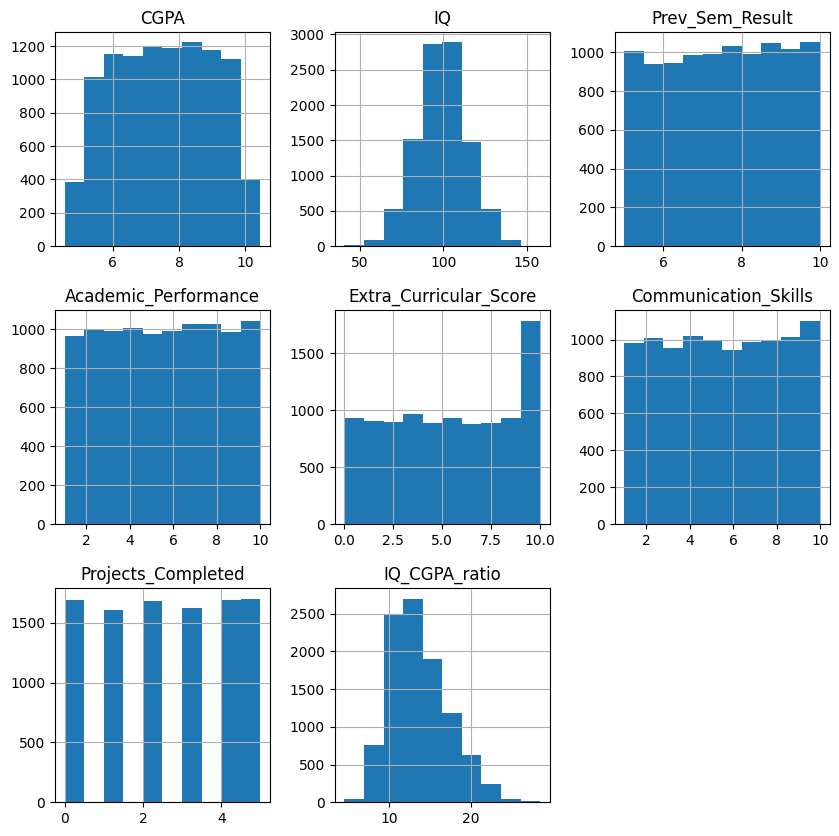

In [ ]:
df[['CGPA', 'IQ', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'IQ_CGPA_ratio']].hist(bins=10, figsize=(10,10))

Outliers

In [ ]:
# Verificando outliers para o QI
# 1. Identificando a média e desvio padrão
print(df['IQ'].mean(),'+/-',df['IQ'].std())

99.4718 +/- 15.0531014859543


In [ ]:
outliers = []
for index, row in df.iterrows():
    if row['IQ'] > df['IQ'].mean() + 2*df['IQ'].std():
       outliers.append(index)
print('Número de outliers no dataset:',len(outliers))
print('Probabilidade de um aluno com QI = ´outliers´:', len(outliers)/len(df))

Número de outliers no dataset: 237
Probabilidade de um aluno com QI = ´outliers´: 0.0237


,0
IQ,"Axes(0.125,0.11;0.775x0.77)"


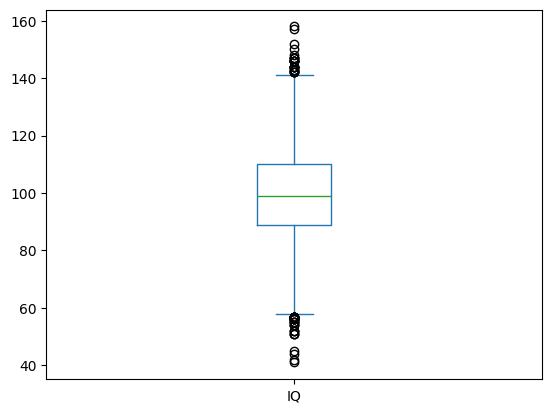

In [ ]:
df['IQ'].plot(kind='box', subplots=True)

# Correlações

In [ ]:
df[['CGPA', 'IQ', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'IQ_CGPA_ratio']].corr('pearson')

,CGPA,IQ,Prev_Sem_Result,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,IQ_CGPA_ratio
CGPA,1.000000,-0.002859,0.980768,-0.002958,0.011441,-0.018242,0.020872,-0.788361
IQ,-0.002859,1.000000,-0.002640,-0.006827,-0.003458,-0.010896,0.014538,0.585427
Prev_Sem_Result,0.980768,-0.002640,1.000000,-0.005765,0.009326,-0.017269,0.018434,-0.772028
Academic_Performance,-0.002958,-0.006827,-0.005765,1.000000,0.011774,-0.019733,-0.013148,-0.003084
Extra_Curricular_Score,0.011441,-0.003458,0.009326,0.011774,1.000000,0.003769,0.008122,-0.008508
Communication_Skills,-0.018242,-0.010896,-0.017269,-0.019733,0.003769,1.000000,-0.004486,0.008164
Projects_Completed,0.020872,0.014538,0.018434,-0.013148,0.008122,-0.004486,1.000000,-0.008254
IQ_CGPA_ratio,-0.788361,0.585427,-0.772028,-0.003084,-0.008508,0.008164,-0.008254,1.000000


In [ ]:
df[['CGPA', 'IQ', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'IQ_CGPA_ratio']].corr('spearman')

,CGPA,IQ,Prev_Sem_Result,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,IQ_CGPA_ratio
CGPA,1.000000,-0.003022,0.981761,-0.003106,0.011770,-0.019008,0.020298,-0.798609
IQ,-0.003022,1.000000,-0.002730,-0.006674,-0.006193,-0.009028,0.016845,0.572676
Prev_Sem_Result,0.981761,-0.002730,1.000000,-0.005762,0.009541,-0.017236,0.018430,-0.784218
Academic_Performance,-0.003106,-0.006674,-0.005762,1.000000,0.011822,-0.019483,-0.012975,-0.001578
Extra_Curricular_Score,0.011770,-0.006193,0.009541,0.011822,1.000000,0.003786,0.008017,-0.010765
Communication_Skills,-0.019008,-0.009028,-0.017236,-0.019483,0.003786,1.000000,-0.004655,0.008746
Projects_Completed,0.020298,0.016845,0.018430,-0.012975,0.008017,-0.004655,1.000000,-0.008044
IQ_CGPA_ratio,-0.798609,0.572676,-0.784218,-0.001578,-0.010765,0.008746,-0.008044,1.000000


# "Perguntas" aos Dados



* Quais fatores mais influenciam a colocação de estudantes?
* Há correlação entre CGPA e IQ?
* Um QI muito alto consegue compensar um CGPA baixo? Ou o inverso?
* Estudantes com mais projetos completados têm melhor CGPA?
* Ter experiência de estágio aumenta significativamente a chance de colocação?
* Qual faculdade tem o maior número de alunos colocados?
